In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\HK1_2023\BI\Midtern\dataset_full.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   _               551585 non-null  int64 
 1   id              551585 non-null  int64 
 2   id_by_category  551585 non-null  int64 
 3   name            551585 non-null  object
 4   main_category   551585 non-null  object
 5   sub_category    551585 non-null  object
 6   image           551585 non-null  object
 7   link            551585 non-null  object
 8   ratings         375791 non-null  object
 9   no_of_ratings   375791 non-null  object
 10  discount_price  490422 non-null  object
 11  actual_price    533772 non-null  object
dtypes: int64(3), object(9)
memory usage: 50.5+ MB


In [21]:
columns_to_drop = ["id_by_category", "_", "link", "image"]
df = df.drop(columns=columns_to_drop)

In [22]:
columns_to_clean = ['discount_price', 'no_of_ratings', 'actual_price']
df[columns_to_clean] = df[columns_to_clean].replace('[₹,]', '', regex=True)
values_to_replace = ['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99', '₹2.99']
df = df[df['id'] != 194625]
df = df[df['id'] != 402750]
df['ratings'] = df['ratings'].replace(values_to_replace, np.nan)
df['ratings'] = df['ratings'].astype(float) 
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)
df['no_of_ratings'] = df['no_of_ratings'].astype(int)
df['discount_price'] = df['discount_price'].astype(float)
df['actual_price'] = df['actual_price'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(int)


In [5]:
df['ratings'].fillna(df['ratings'].mean(), inplace=True)
df['ratings'] = df['ratings'].round(1)
mean_value = df[df['no_of_ratings'] != 0]['no_of_ratings'].median()
df['no_of_ratings'] = df['no_of_ratings'].replace(0, mean_value)


In [24]:
df['discount_price'].fillna(df['actual_price'], inplace=True)
median_value_2 = df['discount_price'].median()
df['discount_price'].fillna(median_value_2, inplace=True)
df['actual_price'].replace(0, np.nan, inplace=True)
median_value = df['actual_price'].median()
df['actual_price'].fillna(median_value, inplace=True)

In [25]:
df.to_csv(r'C:\Users\Admin\Desktop\HK1_2023\BI\Midtern\Chapter1.csv', index=False)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551583 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              551583 non-null  int64  
 1   name            551583 non-null  object 
 2   main_category   551583 non-null  object 
 3   sub_category    551583 non-null  object 
 4   ratings         551583 non-null  float64
 5   no_of_ratings   551583 non-null  int32  
 6   discount_price  551583 non-null  float64
 7   actual_price    551583 non-null  float64
 8   scale           551583 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 40.0+ MB


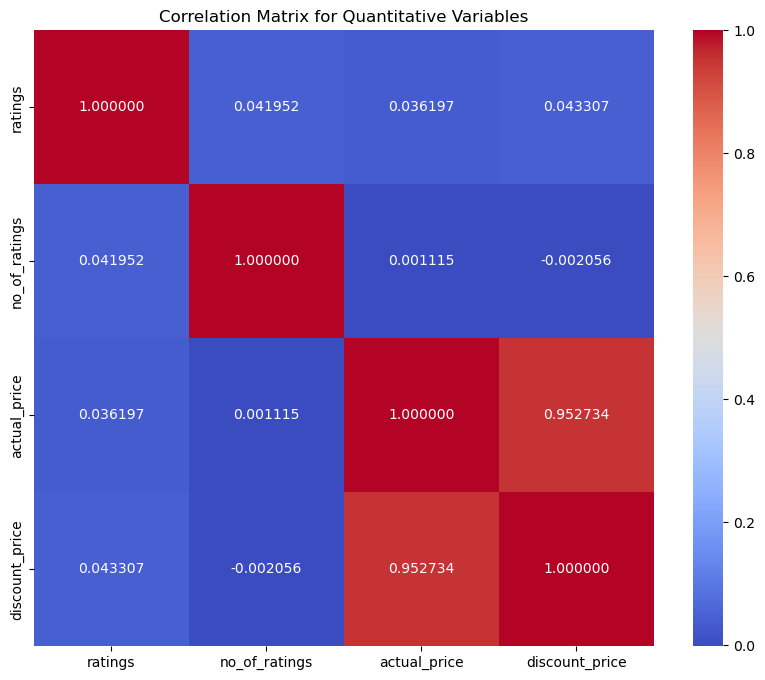

,ratings,no_of_ratings,actual_price,discount_price
ratings,1.000000,0.041952,0.036197,0.043307
no_of_ratings,0.041952,1.000000,0.001115,-0.002056
actual_price,0.036197,0.001115,1.000000,0.952734
discount_price,0.043307,-0.002056,0.952734,1.000000


In [42]:
# Calculating correlations for quantitative variables
quantitative_correlations = df[['ratings', 'no_of_ratings', 'actual_price', 'discount_price']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(quantitative_correlations, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('A')
plt.show()

quantitative_correlations


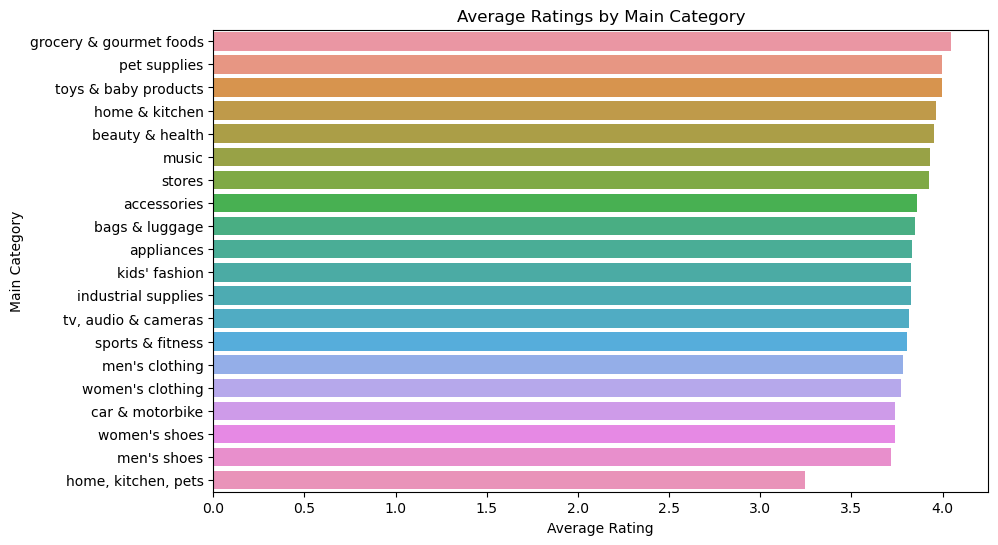

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Calculate average ratings by main_category
avg_ratings_by_category = df.groupby('main_category')['ratings'].mean()

# Sort the results for better visualization
avg_ratings_by_category = avg_ratings_by_category.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings_by_category.values, y=avg_ratings_by_category.index)
plt.xlabel('Average Rating')
plt.ylabel('Main Category')
plt.title('Average Ratings by Main Category')
plt.show()


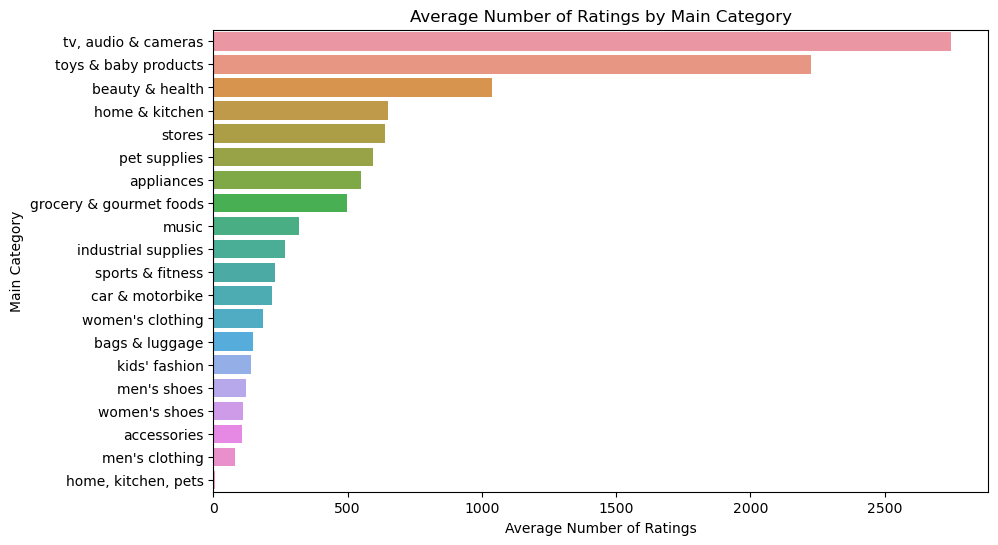

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Calculate average number of ratings by main_category
avg_no_of_ratings_by_category = df.groupby('main_category')['no_of_ratings'].mean()

# Sort the results for better visualization
avg_no_of_ratings_by_category = avg_no_of_ratings_by_category.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_no_of_ratings_by_category.values, y=avg_no_of_ratings_by_category.index)
plt.xlabel('Average Number of Ratings')
plt.ylabel('Main Category')
plt.title('Average Number of Ratings by Main Category')
plt.show()


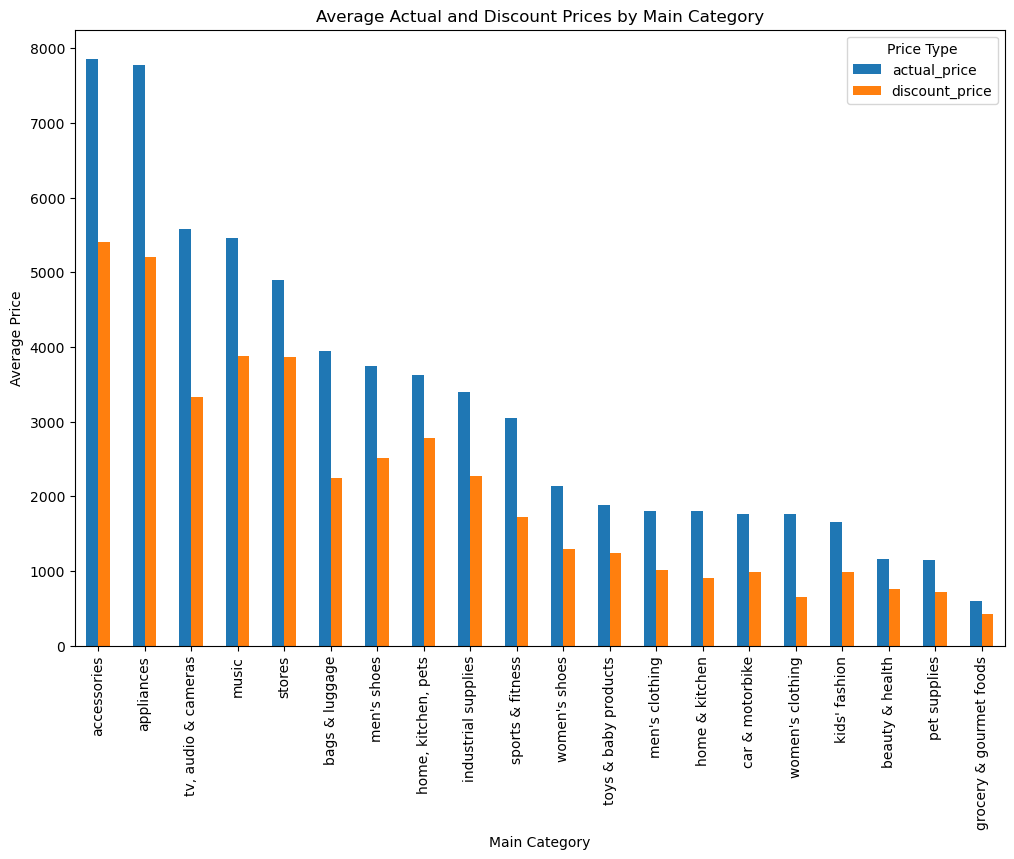

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate average actual and discount prices by main_category
avg_prices_by_category = df.groupby('main_category')[['actual_price', 'discount_price']].mean()

# Sort the results for better visualization
avg_prices_by_category = avg_prices_by_category.sort_values(by='actual_price', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
avg_prices_by_category.plot(kind='bar', ax=plt.gca())
plt.xlabel('Main Category')
plt.ylabel('Average Price')
plt.title('Average Actual and Discount Prices by Main Category')
plt.legend(title='Price Type')
plt.show()


In [43]:
import pandas as pd



# Define thresholds
price_threshold = df['actual_price'].quantile(0.90)  # Top 10% expensive products
rating_threshold = 3  # Ratings lower than 3

# Filter data
expensive_low_rated_products = df[(df['actual_price'] >= price_threshold) & (df['ratings'] < rating_threshold)]

# Display the results
expensive_low_rated_products[['name', 'actual_price', 'ratings']]


,name,actual_price,ratings
49,"Voltas 1 Ton 3 Star, Inverter Split AC(Copper,...",56990.0,2.9
74,LG 2.0 Ton 3 Star AI DUAL Inverter Split AC (C...,85990.0,2.7
88,Panasonic 2 Ton 4 Star Wi-Fi Inverter Smart Sp...,77150.0,2.9
126,"Hitachi 1.5 Ton 5 Star Window AC (Copper, Dust...",49300.0,2.7
134,O-General 1.5 Ton 5 Star EFFICIENT & TROPICAL ...,70530.0,2.7
...,...,...,...
522515,Skagen Classic Analog Silver Dial Women's Watc...,8995.0,1.0
527121,Gosasa Unisex Military Watches Sport Textile N...,9679.0,2.6
528428,Just Cavalli Women Exclusive Silver Luxury Ana...,20500.0,2.0
540468,Shaye Women Floral Print Notched Lapel Green L...,7899.0,2.1


In [50]:
import pandas as pd

# Load the dataset


# Define scales based on number of ratings
scale_conditions = [
    (df['no_of_ratings'] >= 10) & (df['no_of_ratings'] < 100),
    (df['no_of_ratings'] >= 100) & (df['no_of_ratings'] < 1000),
    (df['no_of_ratings'] >= 1000)
]
scale_choices = ['Small-scale', 'Medium-scale', 'Large-scale']
df['scale'] =np.select(scale_conditions, scale_choices, default='Below Scale')

# Define threshold for most expensive products (e.g., top 10%)
price_threshold = df['actual_price'].quantile(0.90)

# Filter for most expensive and low-rated products in each scale
expensive_low_rated = df[(df['actual_price'] >= price_threshold) & (df['ratings'] < 3.0)]

# Extract products for each scale
small_scale_products = expensive_low_rated[expensive_low_rated['scale'] == 'Small-scale']
medium_scale_products = expensive_low_rated[expensive_low_rated['scale'] == 'Medium-scale']
large_scale_products = expensive_low_rated[expensive_low_rated['scale'] == 'Large-scale']

# Display the results for each scale
# You can display them using small_scale_products.head(), etc.
# small_scale_products.head()
medium_scale_products.head()

,id,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,scale
336,336,"Portable Air Conditioners, USB Personal Mini A...",appliances,Air Conditioners,2.6,119,9435.0,9435.0,Medium-scale
718,718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,2.8,207,7671.0,7671.0,Medium-scale
719,719,Air Choice Desktop Protable AC Cooler Fan For ...,appliances,Air Conditioners,2.5,296,8592.0,8592.0,Medium-scale
3614,3614,Wonderchef Nutri-blend BOLT Food Processor & A...,appliances,All Appliances,2.9,240,3994.0,8500.0,Medium-scale
3796,3796,Wonderchef Nutri-blend BOLT Food Processor & A...,appliances,All Appliances,2.9,240,3994.0,8500.0,Medium-scale
